<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/10_timeseries_forecasting_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-dcbfb98d-03b9-73cf-5efb-e5d77a60e85f)


# Get data - bitcoin cost data

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-08-30 15:23:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.005s  

2023-08-30 15:23:14 (36.7 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates = ['Date'], index_col=['Date'])


In [5]:
print(data.shape)
data.head()



(2787, 5)


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
data.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [7]:
import matplotlib.pyplot as plt


<Figure size 1200x600 with 0 Axes>

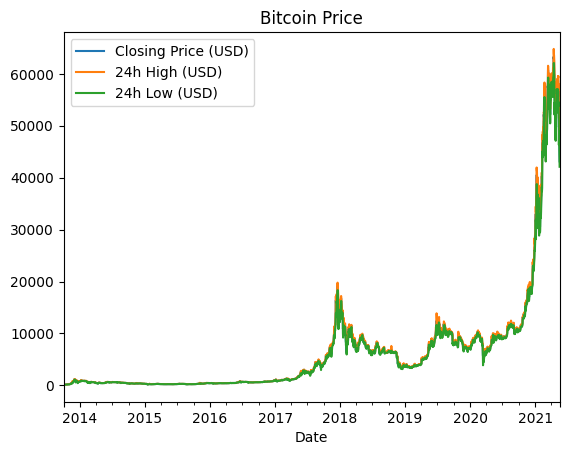

In [8]:
plt.figure(figsize=(12, 6))
data.plot(y=['Closing Price (USD)', '24h High (USD)', '24h Low (USD)'])
plt.title('Bitcoin Price')
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [10]:
#import data using csv modules
import csv
from datetime import datetime

In [11]:
#import data using csv modules

timesteps = []
btc_prices = []

with open('BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        timesteps.append(datetime.strptime(row[1], '%Y-%m-%d'))
        btc_prices.append(float(row[2]))

In [12]:
timesteps[:10], btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

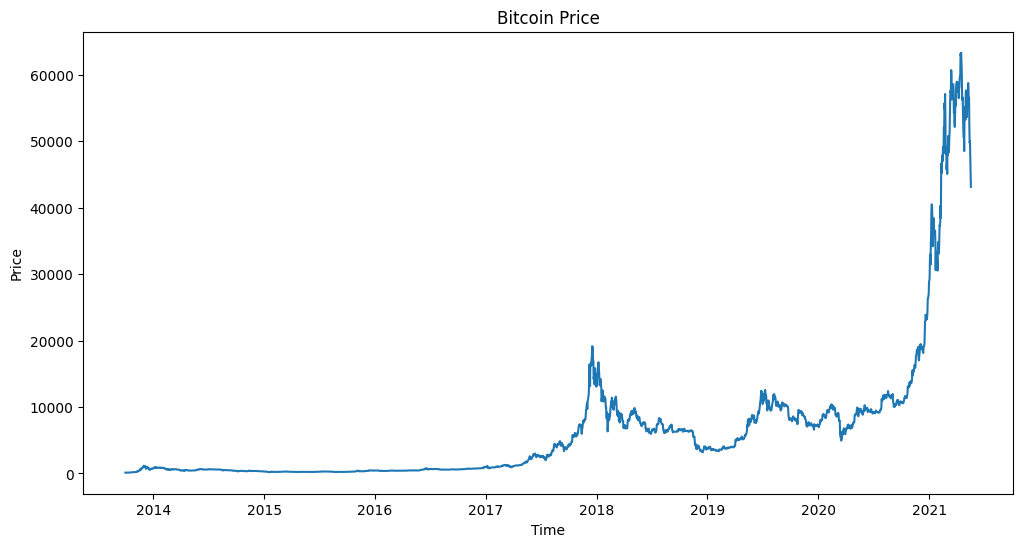

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(timesteps, btc_prices)
plt.title('Bitcoin Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


# Split time series data to train and test data

In [14]:
split_size = int(len(timesteps)*0.8)

x_train = timesteps[:split_size]
y_train = btc_prices[:split_size]

x_test = timesteps[split_size:]
y_test = btc_prices[split_size:]

In [15]:
len(x_train), len(y_train), len(x_test), len(y_test)


(2229, 2229, 558, 558)

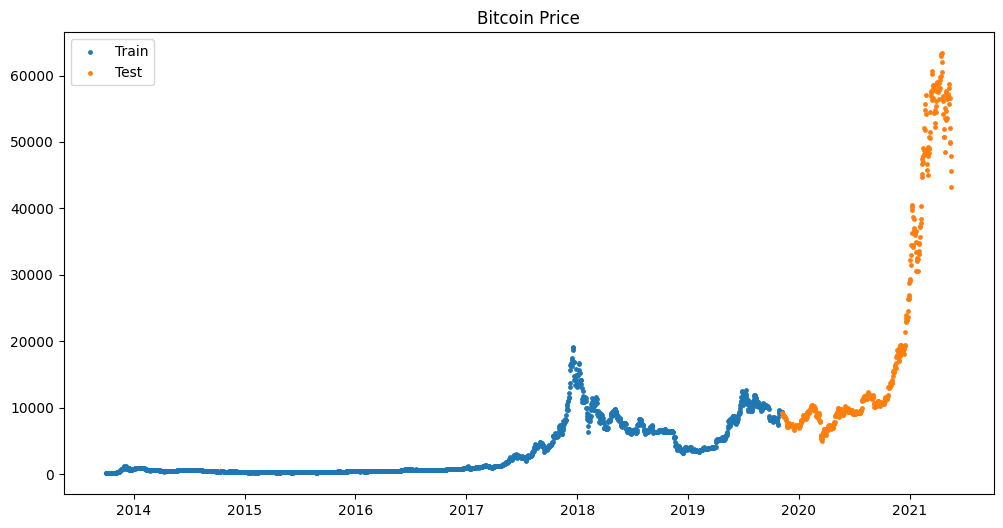

In [16]:
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, label='Train', s=6)
plt.scatter(x_test, y_test, label='Test', s=6)
plt.title('Bitcoin Price')
plt.legend()
plt.show()

In [17]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

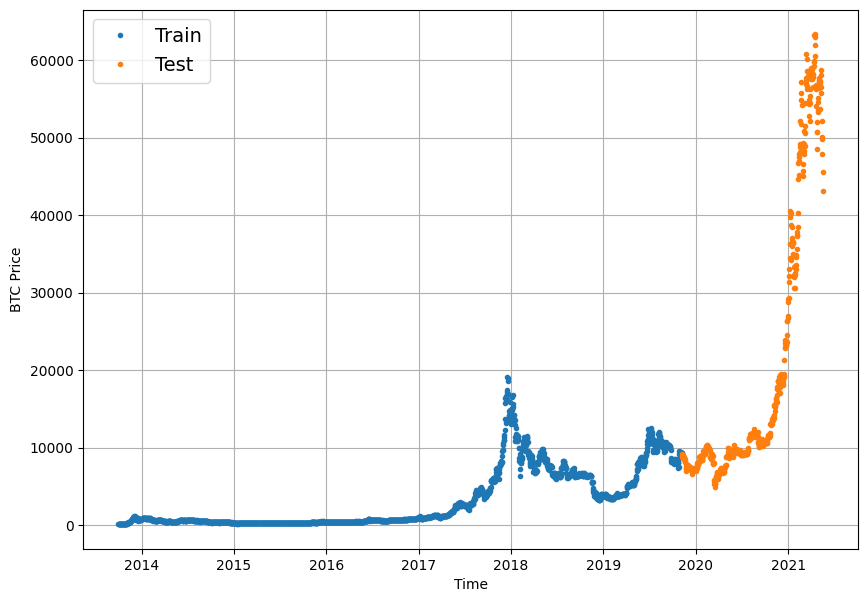

In [18]:
plt.figure(figsize=(10, 7))
plot_time_series(x_train, y_train, label='Train')
plot_time_series(x_test, y_test, label='Test')


# Create a naive model- a base line
$$\hat{y_t}=y_{t-1}$$

In [19]:
test = [1,2,3,4]
tt = np.roll(test, 1)
tt

array([4, 1, 2, 3])

In [20]:
t= test[:-1]
t

[1, 2, 3]

In [21]:
# a native model: the prediction equals to previos step
# horizon = 1
native_forecast = y_test[:-1]

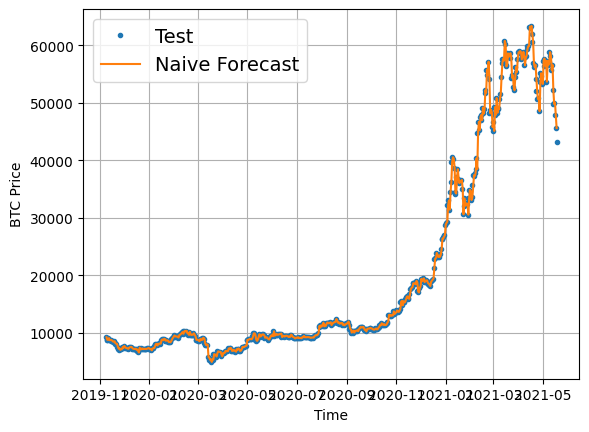

In [22]:
#plot_time_series(x_train, y_train, format='.', label='Train')
plot_time_series(x_test, y_test, format='.', label='Test')
plot_time_series(x_test[1:], native_forecast, format='-', label='Naive Forecast')


# Metrics to evaluate a model

* **MAE** - mean absolute error
* **MSE** - mean squared error
* **RMSE** - root form **MSE**
* **MASE**- mean absolute scaled error
* **Huber**

In [23]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [24]:
# implementation of MASE

def mean_absolute_scaled_error(y_true, y_pred):
  # calculate the mean absolute error
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  # calculate the mean absolute difference between consecutive values
  mad = tf.math.reduce_mean(tf.math.abs(tf.math.subtract(y_true[1:], y_true[:-1])))
  # calculate the MASE
  mase = mae/mad
  return mase


In [25]:
len(y_test[:-1]), len(native_forecast)

(557, 557)

In [26]:
print(f' Mean absolute scaled error = {mean_absolute_scaled_error(y_test[1:], native_forecast)}')

 Mean absolute scaled error = 0.9995700120925903


In [27]:
# implementation all metrics
def evaluate_preds(y_true, y_pred):
  # calculate the mean absolute error
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  # calculate the mean absolute difference between consecutive values
  mad = tf.math.reduce_mean(tf.math.abs(tf.math.subtract(y_true[1:], y_true[:-1])))
  # calculate the MAPE
  mape = 100*tf.math.reduce_mean(tf.math.abs(tf.math.subtract(y_pred,y_true)/y_true)) #tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  # calculate the MASE
  mase = mae/mad

  metrics = dict()
  metrics['mae'] = mae.numpy()
  metrics['mse'] = mse.numpy()
  metrics['rmse'] = rmse.numpy()
  metrics['mape'] = mape.numpy()
  metrics['mase'] = mase.numpy()
  return metrics

In [28]:
naive_result = evaluate_preds(y_test[1:], native_forecast)

In [29]:
np.min(y_test), np.max(y_test), np.mean(y_test)


(4944.7023359837, 63346.7890351052, 20056.632963737222)

In [30]:
100*(567.9802/20056.632963737222)

2.831882106168663

# Windowing our dataset

In [31]:
# create a function windowed data

def get_labelled_windows(x, horizon=1):
  return x[:,:-horizon],x[:,-horizon:]

In [32]:
t = np.array([[1,2,3,4,5,6,7,8]])
get_labelled_windows(t,4)

(array([[1, 2, 3, 4]]), array([[5, 6, 7, 8]]))

In [33]:
# Create function to view NumPy arrays as windows

def make_windows(x, window_size=7, horizon=1):
  x = np.asarray(x)
  # create a window step array
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step+ np.expand_dims(np.arange(len(x)-window_size-horizon+1), axis=0).T

  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array, horizon)
  return windows, labels

In [34]:
def make_windows_using_loop(x, window_size=7, horizon=1):
  x = np.asarray(x)
  # create a window step array
  windows = []
  lebels = []
  for i in range(len(x)-window_size-horizon+1):
    windows.append(x[i:i+window_size])
    lebels.append(x[i+window_size:i+window_size+horizon])
  return np.array(windows), np.array(lebels)

In [35]:
import time

t = np.array(range(1,100000))
st = time.time()
x, y = make_windows_using_loop(t, 3, 2)
print(f'Execution time1 = {time.time()- st}')

st = time.time()
x, y = make_windows(t, 3, 2)

print(f'Execution time2= {time.time()- st}')

Execution time1 = 0.32296204566955566
Execution time2= 0.017117977142333984


In [36]:
x.shape, y.shape

((99995, 3), (99995, 2))

In [37]:
tt = np.array(range(0,10))
indexes = [[0,1,2],[1,2,3]]

a = tt[indexes]
print(a.shape)
print(a)


(2, 3)
[[0 1 2]
 [1 2 3]]


In [38]:
tt[[[0,1],[4,5],[6,7]]]

array([[0, 1],
       [4, 5],
       [6, 7]])

#Create a model_1  window = 7, horizon = 1

In [39]:
window_size = 7
horizon = 1

In [40]:
data.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [41]:
x_data, y_data = make_windows(data['Closing Price (USD)'], window_size, horizon)


In [42]:
x_data.shape, y_data.shape

((2780, 7), (2780, 1))

In [43]:
print(x_data[3], y_data[3])
print(x_data[4], y_data[4])


[118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116] [125.27966]
[121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966] [125.9275]


## Split data to train and test

In [44]:
def split_data(x, y, test_size=0.2):
  train_size = int(len(x)*(1-test_size))
  x_train = x[:train_size]
  x_test = x[train_size:]
  y_train = y[:train_size]
  y_test = y[train_size:]
  return x_train, x_test, y_train, y_test


In [45]:
x_train, x_test, y_train, y_test = split_data(x_data, y_data)

In [46]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((2224, 7), (556, 7), (2224, 1), (556, 1))

In [47]:
x_data.shape

(2780, 7)

## Create a Checkpoint callback

In [48]:
# create checkpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

def create_ckpoint(filename):
  return ModelCheckpoint(filename, save_best_only=True, verbose=0)

def create_early_stopping(patience=3):
  return EarlyStopping(monitor='val_loss',restore_best_weights=True,  patience=patience)

In [49]:
def make_preds(model, data):
  pred = model.predict(data)
  return np.squeeze(pred)

In [50]:
# create model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(window_size, horizon):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_shape=(window_size,)))
  model.add(Dense(horizon, activation='linear'))
  model.compile(optimizer='adam', loss='mae')
  return model

In [51]:
model1 = create_model(window_size, horizon)

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [52]:
MCP1 = create_ckpoint('model1.h5')
ES_CB = create_early_stopping()

model1.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[MCP1],
    verbose=1)


Epoch 1/100
18/18 [==============================] - 8s 52ms/step - loss: 826.0609 - val_loss: 2114.2839
Epoch 2/100
18/18 [==============================] - 0s 11ms/step - loss: 244.5592 - val_loss: 1164.4470
Epoch 3/100
18/18 [==============================] - 0s 10ms/step - loss: 201.1110 - val_loss: 1047.1873
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 179.9914 - val_loss: 997.3705
Epoch 5/100
18/18 [==============================] - 0s 19ms/step - loss: 168.0928 - val_loss: 921.1766
Epoch 6/100
18/18 [==============================] - 0s 17ms/step - loss: 161.6800 - val_loss: 895.3654
Epoch 7/100
18/18 [==============================] - 0s 13ms/step - loss: 157.3584 - val_loss: 903.7504
Epoch 8/100
18/18 [==============================] - 0s 11ms/step - loss: 152.4372 - val_loss: 874.3325
Epoch 9/100
18/18 [==============================] - 0s 11ms/step - loss: 147.1003 - val_loss: 820.2839
Epoch 10/100
18/18 [==============================] - 0s 14ms

In [53]:
# load the best model

# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model('model1.h5')
model_1.evaluate(x_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 563.6161


563.6161499023438

In [54]:
model1.evaluate(x_test, y_test)


18/18 [==============================] - 0s 2ms/step - loss: 626.0469


626.046875

In [55]:
y_test.dtype, y_test.shape


(dtype('float64'), (556, 1))

In [56]:
y_test_ev = tf.squeeze(np.array(y_test, dtype=np.float32))
y_pred = make_preds(model_1, x_test)

model1_result = evaluate_preds(y_test_ev, y_pred)
model1_result

18/18 [==============================] - 0s 2ms/step


{'mae': 563.6161,
 'mse': 1150975.1,
 'rmse': 1072.8351,
 'mape': 2.5274832,
 'mase': 0.9901174}

In [57]:
naive_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [58]:
timesteps = np.array(timesteps)
test_timesteps = timesteps[-len(y_test):]


In [59]:
test_timesteps.shape

(556,)

In [60]:
y_test_ev.shape

TensorShape([556])

In [61]:
y_test_ev.shape, y_pred.shape,test_timesteps.shape

(TensorShape([556]), (556,), (556,))

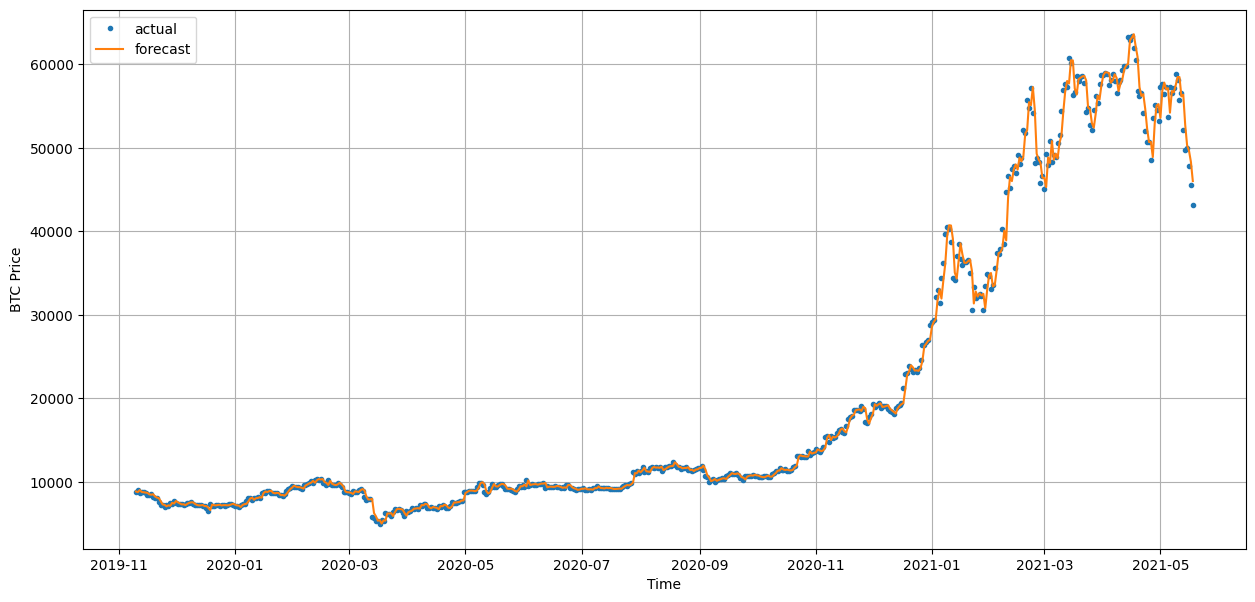

In [62]:
#plot the forecast

plt.figure(figsize=(15, 7))
plot_time_series(test_timesteps, y_test_ev, format='.', start=0, end=None, label='actual')
plot_time_series(test_timesteps, y_pred, format='-', start=0, end=None, label='forecast')
plt.legend()
plt.show()


# Create a model_2 using window = 30, horizon = 1

In [63]:
window_size2 = 30
horizon2 = 1

In [64]:
x_data2, y_data2 = make_windows(data['Closing Price (USD)'], window_size2, horizon2)

In [65]:
x_data2.shape, y_data2.shape


((2757, 30), (2757, 1))

In [66]:
x_data.shape, y_data.shape

((2780, 7), (2780, 1))

In [67]:
data['Closing Price (USD)'].shape

(2787,)

In [68]:
model2 = create_model(window_size2, horizon2)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [69]:
x_train2, x_test2, y_train2, y_test2 = split_data(x_data2, y_data2, test_size=0.2)

In [70]:
x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape


((2205, 30), (552, 30), (2205, 1), (552, 1))

In [71]:
MCP2 = create_ckpoint('model2.h5')

model2.fit(
    x_train2,
    y_train2,
    epochs=100,
    validation_data=(x_test2, y_test2),
    batch_size=128,
    callbacks=[MCP2])


Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 1384.8320 - val_loss: 4373.5625
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 381.5355 - val_loss: 1169.5378
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 203.3580 - val_loss: 1019.1291
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 158.3208 - val_loss: 818.6147
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 160.7749 - val_loss: 821.2989
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 146.4342 - val_loss: 843.0681
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 147.3971 - val_loss: 831.5584
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 140.7202 - val_loss: 860.7885
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 143.9274 - val_loss: 783.3657
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - 

In [72]:
model2.evaluate(x_test2, y_test2)

18/18 [==============================] - 0s 2ms/step - loss: 601.6561


601.6561279296875

In [73]:
model2 = tf.keras.models.load_model('model2.h5')
model2.evaluate(x_test2, y_test2)

18/18 [==============================] - 0s 2ms/step - loss: 601.6561


601.6561279296875

In [74]:
y_pred2 = make_preds(model2, x_test2)


18/18 [==============================] - 0s 1ms/step


In [75]:
y_pred2.shape

(552,)

In [76]:
y_test2_ev = tf.squeeze(np.array(y_test2, dtype=np.float32))

model2_result = evaluate_preds(y_test2_ev, y_pred2)
model2_result

{'mae': 601.65607,
 'mse': 1233789.6,
 'rmse': 1110.7607,
 'mape': 2.7134306,
 'mase': 1.0517007}

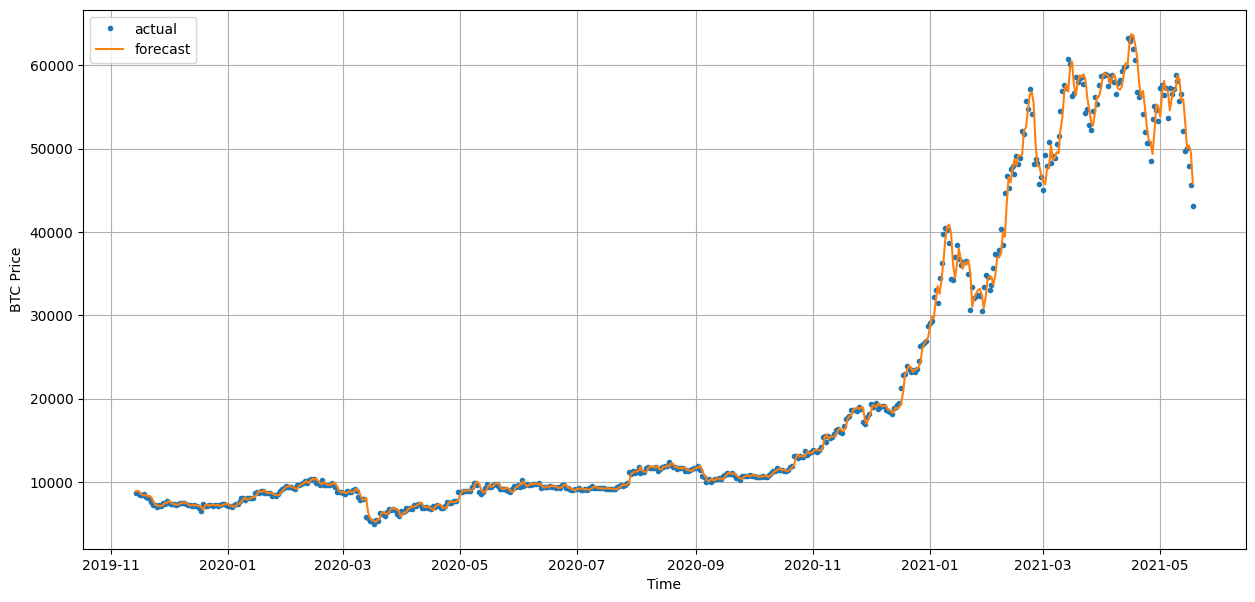

In [77]:
test_timesteps2 = timesteps[-len(y_test2):]

plt.figure(figsize=(15,7))
plot_time_series(test_timesteps2, y_test2_ev, format='.', start=0, end=None, label='actual')
plot_time_series(test_timesteps2, y_pred2, format='-', start=0, end=None, label='forecast')
plt.legend()
plt.show()


# Create model_3 using window = 30, horizon = 7

In [78]:
window_size3 = 30
horizon3 = 7

In [79]:
x_data3, y_data3 = make_windows(data['Closing Price (USD)'], window_size3, horizon3)

In [80]:
x_data3.shape, y_data3.shape


((2751, 30), (2751, 7))

In [81]:
x_train3, x_test3, y_train3, y_test3 = split_data(x_data3, y_data3, test_size=0.2)


In [82]:
x_train3.shape, x_test3.shape, y_train3.shape, y_test3.shape

((2200, 30), (551, 30), (2200, 7), (551, 7))

In [83]:
model3 = create_model(window_size3, horizon3)

model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                                 
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [84]:
MCP3 = create_ckpoint('model3.h5')

model3.fit(
    x_train3,
    y_train3,
    epochs=100,
    validation_data=(x_test3, y_test3),
    callbacks=[MCP3])


Epoch 1/100
69/69 [==============================] - 1s 6ms/step - loss: 628.9610 - val_loss: 2770.1855
Epoch 2/100
69/69 [==============================] - 0s 4ms/step - loss: 342.6341 - val_loss: 2021.1924
Epoch 3/100
69/69 [==============================] - 0s 3ms/step - loss: 304.2449 - val_loss: 1564.9531
Epoch 4/100
69/69 [==============================] - 0s 3ms/step - loss: 288.5532 - val_loss: 1750.4312
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: 325.3308 - val_loss: 1629.3105
Epoch 6/100
69/69 [==============================] - 0s 4ms/step - loss: 282.7699 - val_loss: 1606.4031
Epoch 7/100
69/69 [==============================] - 0s 3ms/step - loss: 265.2503 - val_loss: 1451.4561
Epoch 8/100
69/69 [==============================] - 0s 4ms/step - loss: 261.8088 - val_loss: 1421.7107
Epoch 9/100
69/69 [==============================] - 0s 4ms/step - loss: 256.2074 - val_loss: 1415.6913
Epoch 10/100
69/69 [==============================] - 0s 3ms/ste

In [85]:
model3.evaluate(x_test3, y_test3)


18/18 [==============================] - 0s 2ms/step - loss: 1296.7787


1296.7786865234375

In [86]:
# load the best model
model3= tf.keras.models.load_model('model3.h5')
model3.evaluate(x_test3, y_test3)


18/18 [==============================] - 0s 2ms/step - loss: 1198.2692


1198.2691650390625

In [87]:
# calculate metrics
y_pred3 = make_preds(model3, x_test3)

y_pred3.shape

18/18 [==============================] - 0s 1ms/step


(551, 7)

In [88]:
y_test3.shape

(551, 7)

In [89]:
y_test3 = tf.cast(y_test3, dtype=tf.float32)
y_test3.shape


TensorShape([551, 7])

In [90]:
model3_result = evaluate_preds(y_test3, y_pred3)

In [91]:
model3_result['mae'].shape, model3_result['mse'].shape


((551,), (551,))

In [92]:
for key in model3_result.keys():
    model3_result[key] = np.mean(model3_result[key])

model3_result

{'mae': 1198.269,
 'mse': 5112047.5,
 'rmse': 1382.3553,
 'mape': 5.4753103,
 'mase': 2.132253}

In [93]:
naive_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [94]:
y_test3.shape

TensorShape([551, 7])

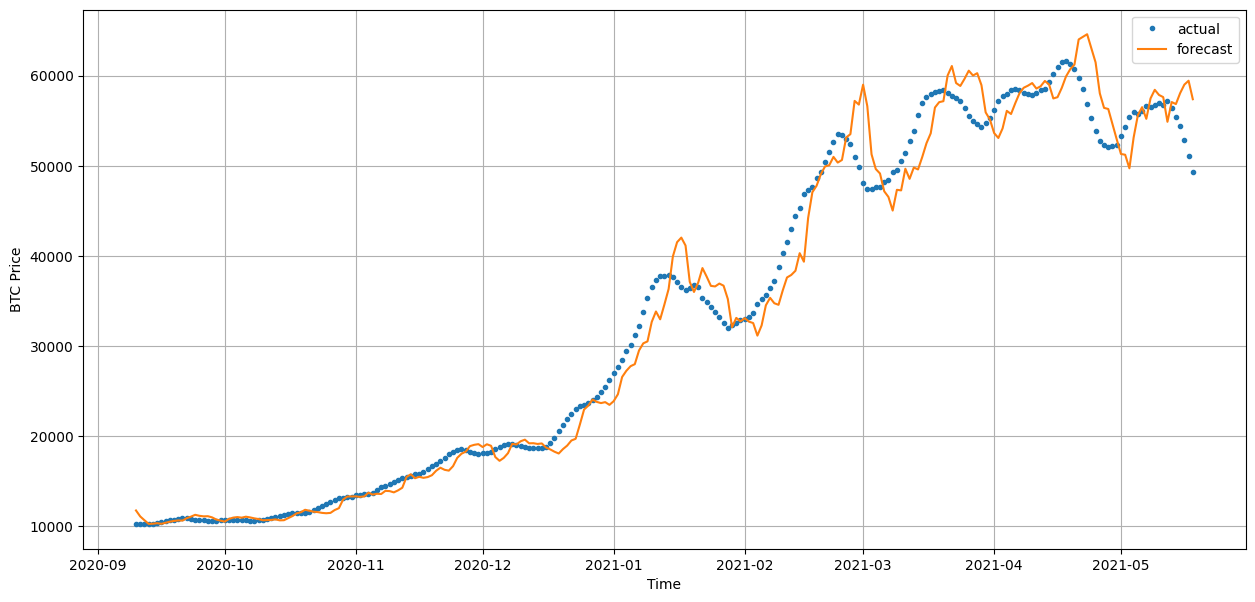

In [95]:
test_timesteps3 = timesteps[-len(y_test3):]

plt.figure(figsize=(15,7))
plot_time_series(test_timesteps3, tf.reduce_mean(y_test3, axis = 1), format='.', start=300, end=None, label='actual')
plot_time_series(test_timesteps3, tf.reduce_mean(y_pred3, axis = 1), format='-', start=300, end=None, label='forecast')
plt.legend()
plt.show()

# Compare performing models

In [96]:
all_results = pd.DataFrame([naive_result, model1_result, model2_result, model3_result], index=['naive', 'model1', 'model2', 'model3'])


In [97]:
all_results

,mae,mse,rmse,mape,mase
naive,567.980225,1147547.000,1071.236206,2.516525,0.999570
model1,563.616089,1150975.125,1072.835083,2.527483,0.990117
model2,601.656067,1233789.625,1110.760742,2.713431,1.051701
model3,1198.269043,5112047.500,1382.355347,5.475310,2.132253


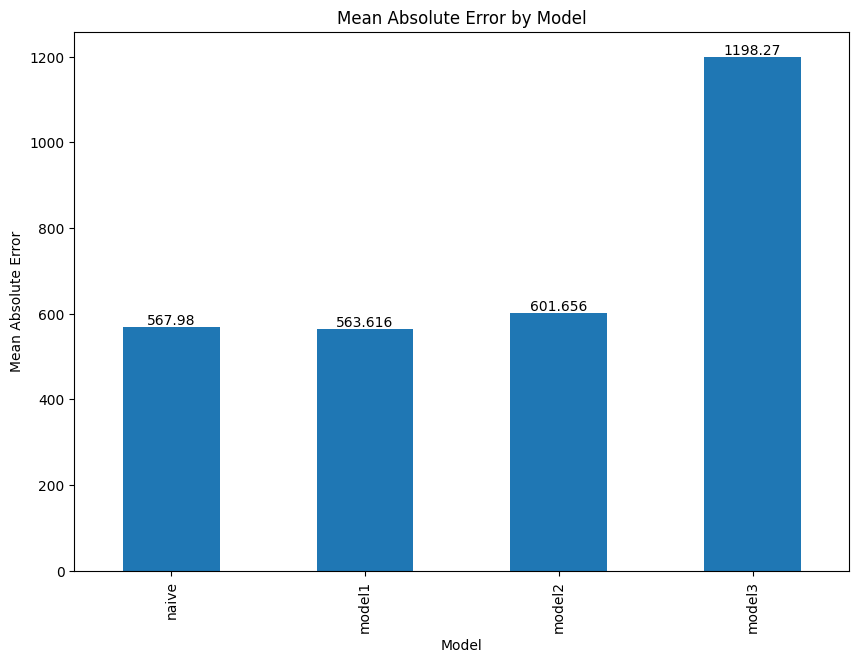

In [98]:
plt.figure(figsize=(10,7))
ax = all_results['mae'].plot.bar()
ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('Model')
ax.set_title('Mean Absolute Error by Model')
ax.bar_label(ax.containers[0])
plt.show()


In [99]:
all_results.mae

naive      567.980225
model1     563.616089
model2     601.656067
model3    1198.269043
Name: mae, dtype: float32

# Create model_4 CNN1

In [100]:
# Create a model
window_size4 = 7
horizon4 = 1

In [101]:
x_data4, y_data4 = make_windows(data['Closing Price (USD)'], window_size4, horizon4)


In [102]:
x_data4.shape, y_data4.shape

((2780, 7), (2780, 1))

In [103]:
x_train4, x_test4, y_train4, y_test4 = split_data(x_data4, y_data4, test_size=0.2)

In [104]:
x_train4.shape, x_test4.shape, y_train4.shape, y_test4.shape


((2224, 7), (556, 7), (2224, 1), (556, 1))

In [105]:
t = tf.constant(x_train4[0])
t

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [106]:
# add extra demantion to input

expand_dim_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

t_exp = expand_dim_layer(t)
t_exp

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [162]:
def create_CNN1_model(window_size4, horizon4):

  inputs = tf.keras.Input(shape=(window_size4, ))
  print(inputs.shape)
  x = tf.keras.layers.Lambda(lambda d: tf.expand_dims(d, axis=2))(inputs)
  print(x.shape)
  x = tf.keras.layers.Conv1D(
      input_shape =(window_size4, 1),
      filters=128,
      kernel_size=5,
      strides=1,
      padding='causal',
      activation='relu')(x)
  print(x.shape)
  x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, strides=1, padding='causal', activation='relu')(x)
  print(x.shape)

  x = tf.keras.layers.GlobalMaxPooling1D()(x)
  print(x.shape)
  outputs = tf.keras.layers.Dense(horizon4, activation='linear')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  model.compile(loss='mae', optimizer='adam', metrics=['mae'])
  return model

In [163]:
model4 = create_CNN1_model(window_size4, horizon4)
model4.summary()

(None, 7)
(None, 7, 1)
(None, 7, 128)
(None, 7, 64)
(None, 64)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 7)]               0         
                                                                 
 lambda_9 (Lambda)           (None, 7, 1)              0         
                                                                 
 conv1d_16 (Conv1D)          (None, 7, 128)            768       
                                                                 
 conv1d_17 (Conv1D)          (None, 7, 64)             24640     
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_16 (Dense)            (None, 1)                 65     

In [164]:
MCP4 = ModelCheckpoint('best_model4.h5', monitor='val_mae', mode='min', save_best_only=True, verbose=1)

model4.fit(x_train4, y_train4, epochs=100, verbose=1, batch_size=128, validation_data=(x_test4, y_test4), callbacks=[MCP4])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 1483.5776 - mae: 1483.5776 
Epoch 1: val_mae improved from inf to 2816.85693, saving model to best_model4.h5
18/18 [==============================] - 1s 15ms/step - loss: 1370.3314 - mae: 1370.3314 - val_loss: 2816.8569 - val_mae: 2816.8569
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 326.4340 - mae: 326.4340
Epoch 2: val_mae improved from 2816.85693 to 1469.52332, saving model to best_model4.h5
18/18 [==============================] - 0s 7ms/step - loss: 316.9050 - mae: 316.9050 - val_loss: 1469.5233 - val_mae: 1469.5233
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 243.4799 - mae: 243.4799
Epoch 3: val_mae improved from 1469.52332 to 1374.22900, saving model to best_model4.h5
18/18 [==============================] - 0s 8ms/step - loss: 241.9713 - mae: 241.9713 - val_loss: 1374.2290 - val_mae: 1374.2290
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss:

In [150]:
model4.evaluate(x_test4, y_test4)


18/18 [==============================] - 0s 6ms/step - loss: 574.5280 - mae: 574.5280


[574.5280151367188, 574.5280151367188]

In [151]:
model4 = tf.keras.models.load_model('best_model4.h5')
model4.evaluate(x_test4, y_test4)


18/18 [==============================] - 0s 3ms/step - loss: 574.1472 - mae: 574.1472


[574.1471557617188, 574.1471557617188]

In [152]:
y_pred4 = model4.predict(x_test4)
y_pred4.shape


18/18 [==============================] - 0s 2ms/step


(556, 1)

In [153]:
y_pred4 = tf.squeeze(y_pred4)
y_pred4.shape



TensorShape([556])

In [154]:
y_test4 = tf.cast(y_test4, dtype=tf.float32)
y_test4.shape

TensorShape([556, 1])

In [155]:
model4_results = evaluate_preds(tf.squeeze(y_test4), y_pred4)
model4_results

{'mae': 574.1471,
 'mse': 1173896.9,
 'rmse': 1083.4652,
 'mape': 2.632722,
 'mase': 1.0086174}

In [156]:
naive_result

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

# Create LSTM model

In [184]:
def create_LSTM_model(window_size4, horizon4):
  inputs = tf.keras.Input(shape=(window_size4, ))
  print(inputs.shape)
  x = tf.keras.layers.Lambda(lambda d: tf.expand_dims(d, axis=2))(inputs)
  print(x.shape)
  x = tf.keras.layers.LSTM(64, return_sequences=False)(x)
  print(x.shape)
  outputs = tf.keras.layers.Dense(horizon4, activation='linear')(x)

  model = tf.keras.Model(inputs=inputs, outputs=outputs)
  model.compile(loss='mae', optimizer='adam', metrics=['mae'])
  return model


In [185]:
model5 = create_LSTM_model(window_size4, horizon4)
model5.summary()

(None, 7)
(None, 7, 1)
(None, 64)
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 7)]               0         
                                                                 
 lambda_16 (Lambda)          (None, 7, 1)              0         
                                                                 
 lstm_12 (LSTM)              (None, 64)                16896     
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [186]:
MCP5 = ModelCheckpoint('best_model5.h5', monitor='val_mae', mode='min', save_best_only=True, verbose=1)

model5.fit(x_train4, y_train4, epochs=100, verbose=1, batch_size=128, validation_data=(x_test4, y_test4), callbacks=[MCP5])

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 3149.9053 - mae: 3149.9053 
Epoch 1: val_mae improved from inf to 20096.38672, saving model to best_model5.h5
18/18 [==============================] - 3s 32ms/step - loss: 3158.7625 - mae: 3158.7625 - val_loss: 20096.3867 - val_mae: 20096.3867
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 3125.7727 - mae: 3125.7727
Epoch 2: val_mae improved from 20096.38672 to 20095.31250, saving model to best_model5.h5
18/18 [==============================] - 0s 8ms/step - loss: 3157.9348 - mae: 3157.9348 - val_loss: 20095.3125 - val_mae: 20095.3125
Epoch 3/100
 9/18 [==============>...............] - ETA: 0s - loss: 3112.0869 - mae: 3112.0869
Epoch 3: val_mae improved from 20095.31250 to 20094.50391, saving model to best_model5.h5
18/18 [==============================] - 0s 9ms/step - loss: 3156.9995 - mae: 3156.9995 - val_loss: 20094.5039 - val_mae: 20094.5039
Epoch 4/100
14/18 [======================>.......

In [187]:
model5.evaluate(x_test4, y_test4)

18/18 [==============================] - 0s 3ms/step - loss: 20024.9375 - mae: 20024.9375


[20024.9375, 20024.9375]

In [190]:
all_results = pd.DataFrame([naive_result, model1_result, model2_result, model3_result,model4_results], index=['naive', 'model1', 'model2', 'model3', 'model4'])
all_results


,mae,mse,rmse,mape,mase
naive,567.980225,1147547.000,1071.236206,2.516525,0.999570
model1,563.616089,1150975.125,1072.835083,2.527483,0.990117
model2,601.656067,1233789.625,1110.760742,2.713431,1.051701
model3,1198.269043,5112047.500,1382.355347,5.475310,2.132253
model4,574.147095,1173896.875,1083.465210,2.632722,1.008617


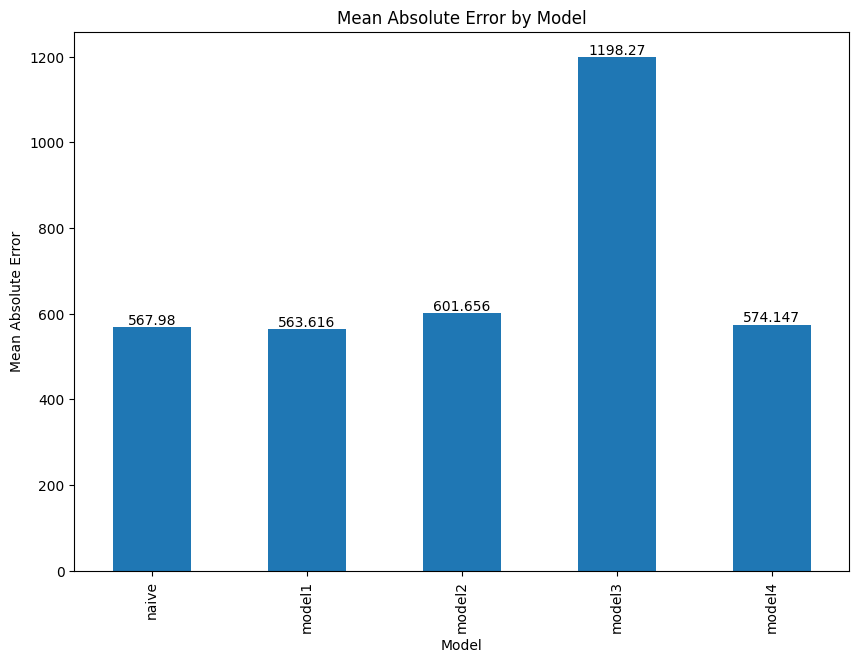

In [189]:
plt.figure(figsize=(10,7))
ax = all_results['mae'].plot.bar()
ax.set_ylabel('Mean Absolute Error')
ax.set_xlabel('Model')
ax.set_title('Mean Absolute Error by Model')
ax.bar_label(ax.containers[0])
plt.show()